<a href="https://colab.research.google.com/github/priyanshu3042/Level3Task2/blob/main/Level3Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Dataset .csv to Dataset .csv


/tmp/ipython-input-2-2799350847.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_cuisines.values, y=popular_cuisines.index, palette="viridis")


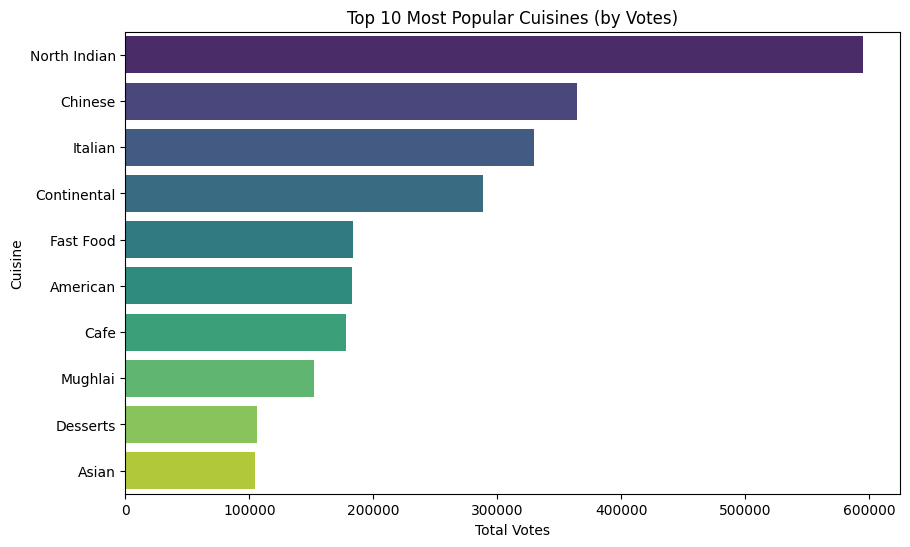

/tmp/ipython-input-2-2799350847.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated_cuisines.values, y=top_rated_cuisines.index, palette="magma")


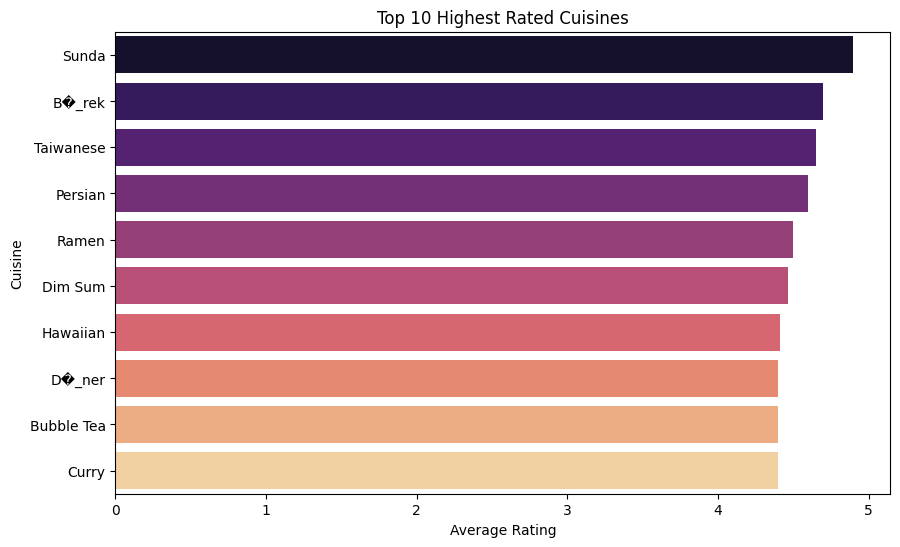

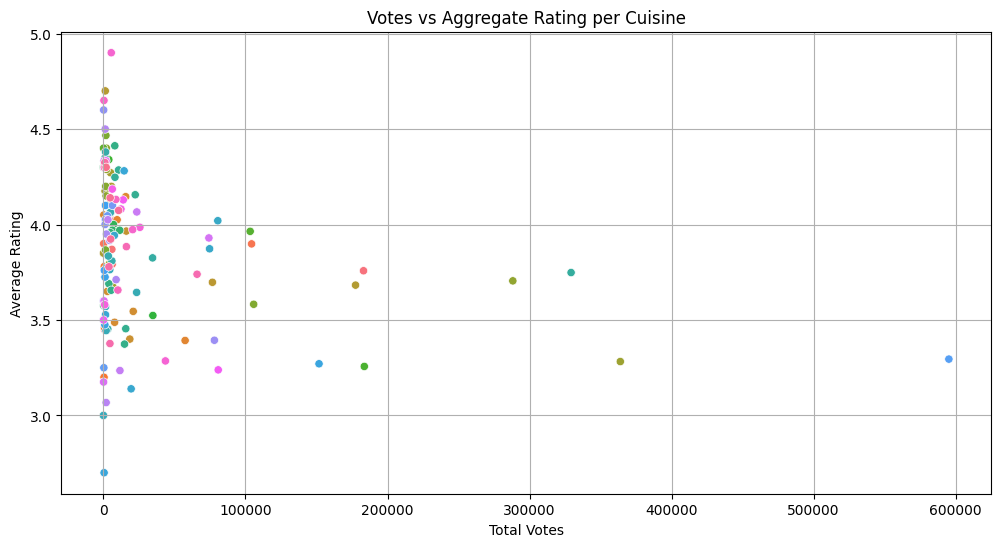

In [2]:
# Step 2: Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 3: Load the dataset (replace filename with your uploaded file name)
df = pd.read_csv("Dataset .csv")  # Be sure this matches the uploaded file exactly

# Step 4: Select and clean relevant columns
df = df[['Cuisines', 'Aggregate rating', 'Votes']].dropna()
df = df[df['Votes'] > 0]
df = df[df['Aggregate rating'] > 0]

# Step 5: Split multiple cuisines into separate rows
df['Cuisines'] = df['Cuisines'].astype(str)
df_expanded = df.assign(Cuisines=df['Cuisines'].str.split(', '))
df_expanded = df_expanded.explode('Cuisines')

# Task 1: Most popular cuisines based on number of votes
popular_cuisines = df_expanded.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=popular_cuisines.values, y=popular_cuisines.index, palette="viridis")
plt.title("Top 10 Most Popular Cuisines (by Votes)")
plt.xlabel("Total Votes")
plt.ylabel("Cuisine")
plt.show()

# Task 2: Cuisines that tend to receive higher ratings
top_rated_cuisines = df_expanded.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_rated_cuisines.values, y=top_rated_cuisines.index, palette="magma")
plt.title("Top 10 Highest Rated Cuisines")
plt.xlabel("Average Rating")
plt.ylabel("Cuisine")
plt.show()

# Task 3: Relationship between votes and ratings by cuisine
summary = df_expanded.groupby('Cuisines').agg({
    'Votes': 'sum',
    'Aggregate rating': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=summary, x='Votes', y='Aggregate rating', hue='Cuisines', legend=False)
plt.title("Votes vs Aggregate Rating per Cuisine")
plt.xlabel("Total Votes")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()